### Accessing Data with API's

**OBJECTIVES**

- More with `groupby` and `.agg`
- Data Access via API


### `.groupby` 

The split-apply-combine paradigm we have explored is incredibly powerful and useful tool.  In addition to performing a single aggregate operation, we can use multiple built in or custom aggregate functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### The Data

The dataset `salesdaily.csv` contains daily pharmaceutical sales data and the columns are described as follows:

```
M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
```

Load in the data and be sure to set a `datetime` index. 

In [2]:
#read in the data
sales = pd.read_csv('data/salesdaily.csv', index_col = 0, parse_dates=True)
sales.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [3]:
#look at the info
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


**EXAMPLE**

How do the daily average sales of `M01AB` compare to those of `NO5B`?  Construct a horizontal bar chart.

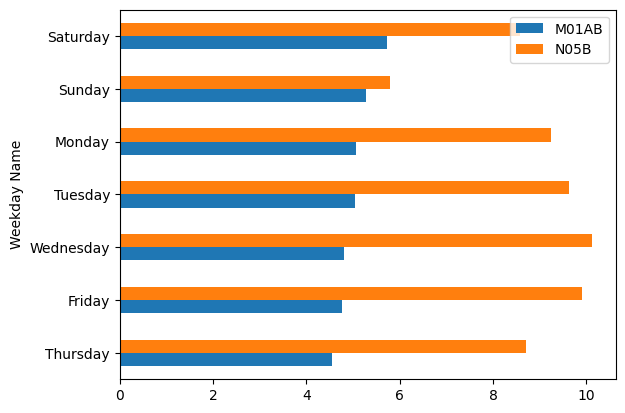

In [4]:
#groupby and then plot -- kind = 'barh'
sales.groupby('Weekday Name')[['M01AB', 'N05B']].mean().sort_values(by = 'M01AB').plot(kind = 'barh');

#### Multiple Summaries with `agg`

Rather than a single aggregate formula, we can use mutliple aggregate functions with the `.agg` method, and pass the functions or common names as strings.  You may also use a custom function.

In [5]:
#mean and standard deviation
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', 'median', np.median])

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_58954/1033225833.py:2: FutureWarning: The provided callable <function median at 0x10dbd3ba0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'median' instead.
  sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', 'median', np.median])


M01AB                        
                  mean       std median median
Weekday Name                                  
Friday        4.770476  2.485300   4.50   4.50
Monday        5.055736  2.688525   5.00   5.00
Saturday      5.727755  2.907926   5.01   5.01
Sunday        5.287175  2.908975   5.00   5.00
Thursday      4.549169  2.575230   4.33   4.33
Tuesday       5.047331  2.816525   4.68   4.68
Wednesday     4.797356  2.609771   4.34   4.34

In [6]:
#custom functino to fine range in data
def lowhi(x):
    return x.max() - x.min()

In [7]:
#mean, median, range
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'median', lowhi])

M01AB              
                  mean median  lowhi
Weekday Name                        
Friday        4.770476   4.50  12.50
Monday        5.055736   5.00  14.66
Saturday      5.727755   5.01  17.34
Sunday        5.287175   5.00  17.00
Thursday      4.549169   4.33  16.68
Tuesday       5.047331   4.68  14.33
Wednesday     4.797356   4.34  13.68

## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything

Documentation is here...

https://pandas-datareader.readthedocs.io/en/latest/index.html

This documentation is good too:

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [9]:
# pip install pandas-datareader

**Quick Example**

Extract five years of 10-year constant maturity yields on U.S. government bonds.

In [10]:
import pandas_datareader as pdr
matyld = pdr.get_data_fred('GS10')

In [11]:
#look at top 5 rows
matyld.head()

,GS10
DATE,
2018-11-01,3.12
2018-12-01,2.83
2019-01-01,2.71
2019-02-01,2.68
2019-03-01,2.57


In [12]:
#look at info
matyld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-11-01 to 2023-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GS10    59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


**Excercise** Can you find the unemployment rate for the US from FRED. Use the data reader. And create a plot of unemployment from the 2005 on ward. Challenge, can you create a histogram of unemployment rates?

### Accessing Data Without a Library

In the `pandas_datareader` we have a library written in Python that interacts with data for us.  Sometimes, this is not possible and you will need to interact with the data in a more general environment.  Let's try this out by looking up some information about cats.  Here is the documentation [link](https://developers.thecatapi.com/view-account/ylX4blBYT9FaoVd6OhvR?report=bOoHBz-8t). 

![](images/catapi.png)

In [13]:
import requests

**Response**

- Random Cat: https://api.thecatapi.com/v1/images/search
- 10 Bengal Cats: https://api.thecatapi.com/v1/images/search?limit=10&breed_ids=beng&api_key=REPLACE_ME

In [14]:
#url for a random cat


In [15]:
#request of the url


In [16]:
#look at response code


In [17]:
#text of request


In [18]:
#examine the json


In [19]:
#repeat for bengal cats


In [20]:
#extract the links to images


**Problem**: 

![](https://dog.ceo/img/dog-api-logo.svg)

Head over to the Dog API [here](https://dog.ceo/dog-api/).  

1. Make a request that returns a list of all dog breeds.

2. Make a request that returns a random image of a dog and extract the url.  

### ALPHA VANTAGE

A more detailed example than that of `pandas_datareader`.  The API for Alpha Vantage provides many Forex and Crypto feeds as well as economic and technical indicators.  To use it, you will need an API key -- so head over to [here](https://www.alphavantage.co/#page-top) and let's sign up for one. 

![](images/alpha.png)

In [21]:
base_url = 'https://www.alphavantage.co/query'


In [22]:
#examine the response


In [23]:
#extract the headline


**Exercise**

Use the `TIME_SERIES_DAILY` endpoint to extract data for `AAPL`. 

### Different Endpoints

Let's explore some news about Apple.  The documentation on the news & sentiment endpoint is [here](https://www.alphavantage.co/documentation/#news-sentiment). 

In [24]:
base_url = 'https://www.alphavantage.co/query'

In [25]:
#news about AAPL


**PROBLEM**: Extract weekly data for bitcoin (`BTC`) from the Cryptocurrency endpoint in Alpha Vantage.


#### API Wrappers

Often, someone has written a library to wrap the API.  For example, there is an alpha vantage Python API wrapper:

- https://github.com/RomelTorres/alpha_vantage

Let's head over, install the library, and retrieve some intraday returns.

#### Summary

Great job!  Now, you have additional tools for going out and accessing data from a variety of sources.  Your homework this week will involve extracting further information from the API's and visualizing this with `seaborn` and `matplotlib`.